# Question Answering System

Overview: 

Question answering (QA) is a popular researched problem in natural language processing. QA has been used to develop dialog systems and chatbots designed to simulate human conversation. Here we researched two different models for QA system.

First, We researched a learning model called memory networks. Memory networks reason with inference components combined with a long-term memory component; they learn how to use these jointly. The long-term memory can be read and written to, with the goal of using it for prediction. We investigate these models in the context of question answering (QA) where the long-term memory effectively acts as a (dynamic) knowledge base, and the output is a textual response. 

Second, based on memory networks, we implemented a neural network with a recurrent attention model over a possibly large external memory. The architecture is a form of Memory Network but unlike the model in that work, it is trained end-to-end, and hence requires significantly less supervision during training, making it more generally applicable in realistic settings. 
We evaluate them on a large-scale QA task, and a smaller, but more complex, toy task generated from a simulated world. 
In the latter, we show the reasoning power of such models by chaining multiple supporting sentences to answer questions that require understanding the intentions of verbs.


# Approach:

We utilize a novel recurrent neural network (RNN) architecture where the recurrence reads from a possibly large 
external memory multiple times before outputting a symbol. The model can be considered a continuous form of the 
Memory Networks. The continuity we present means that it can be trained end-to-end from input-output pairs, 
hence requires significantly less supervision during training, making it more generally applicable in realistic 
settings and to more tasks.  
 
The model takes the set of inputs and stores it in the memory. The question as another input from the user and the 
answer of the question as output. The model writes all the inputs in the memory up to a fixed buffer size and then 
it finds a continuous representation for the inputs and the question. The continuous representation is then processed 
with many repetitions to get the answer as output. This allows back-propagation of the error signal through multiple 
memory accesses back to the input during training.  
 
We start by describing our model in the single layer case, which implements a single memory hop operation. We then 
show it can be stacked to give multiple hops in memory to handle K hop operations.  

# Dataset:

The quest for knowledge is deeply human, and so it is not surprising that practically as soon as there were computers, and certainly as soon as there was natural language processing, we were trying to use computers to answer textual questions. In this project, we have taken the Babi dataset to implement the Question Answering System and know how to it works in detail.  
 
The Facebook bAbI dataset is a synthetic dataset of 20 question-answering tasks. Each task targets a specific skill that a general reasoning agent would be expected to have, such as answering yes/no questions or performing deduction over multiple sentences.  
 
Training Set Size: Each of the 20 tasks consists of 1,000 training examples and 1,000 test examples. The tasks are generated from a simulation of characters and objects interacting in a small, closed world, which produces ground text describing the scene and question/answer pairs. Supervision is provided in the form of answers for each of the questions and the location of relevant sentences in the input required to answer the question. For development, we randomly partition the 1,000 training examples for each task into 900 example training sets and 100 example development sets. To answer the questions correctly, the models must be able to perform induction, deduction, fact chaining, and more. 
 
The dataset presents tasks for testing text understanding and reasoning. 
The aim is that each task tests a unique aspect of text and reasoning, and hence test different capabilities of learning models.  
All of the tasks are noiseless and a human able to read that language can potentially achieve 100% accuracy. The data itself is produced using a simple simulation of characters and objects moving around and interacting in locations.  

# Technical Approach:

Memory Networks 
 
Memory Networks combine inputs with attention on memories to provide reasoned outputs. Limits the first iteration’s scope to be as simple as possible. It consists of a recurrent controller module that accepts an initial query. To start, its memory is loaded with a set of facts. The query and facts are bag-of-words vectors. The controller predicts an attention vector (with a supervision signal) to choose a fact. It reads the chosen memory to update its hidden state. After several repetitions, or hops, it formulates an output. The output ranks possible responses from a dictionary of words. Error signals back-propagate through the network via the output and the supervised attention episodes. 

End to End Memory Network

End-to-end Memory Network (MemN2N) learns without attention supervision. It uses softattention (a probability vector) to read the memory. Thus, it is fully-differentiable and can learn from output supervision alone. The newer model still fails on some toy benchmark tasks. Yet, it succeeds on several real-world benchmarks, such as children’s books and news question sets. 

• Soft attention version of MemN2N 
• Flexible read-only memory
• Multiple memory lookups (hops)
• Can consider multiple memory before deciding output
• More reasoning power
• End-to-end training. 
• Only needs final output for training 
• Simple back-propagation

4 steps of MemN2N implementation:  
  
• I (input): converts to word embeddings X(dialog). 
• G (generalization): stores x in next available slot Mn() 
• (output): Loops over all memories k=1 or 2 times: 
1st loop max: finds best match Mi with X(question). 
2nd loop max: finds best match Mj with (x, Mi) 
• The output o is represented with (x, Mi, Mj). 
• R (response): ranks all words in the dictionary given O and returns best single word. 

# Code with Documentation

Document Clustering - To identify the latent structures within the Text using k-means

This is showing how the scikit-learn can be used to cluster documents by topics using a bag-of-words approach. This uses a scipy.sparse matrix to store the features instead of standard numpy arrays.

Two feature extraction methods can be used in this example:

TfidfVectorizer uses a in-memory vocabulary (a python dict) to map the most frequent words to features indices and hence compute a word occurrence frequency (sparse) matrix. The word frequencies are then reweighted using the Inverse Document Frequency (IDF) vector collected feature-wise over the corpus.

HashingVectorizer hashes word occurrences to a fixed dimensional space, possibly with collisions. The word count vectors are then normalized to each have l2-norm equal to one (projected to the euclidean unit-ball) which seems to be important for k-means to work in high dimensional space.

HashingVectorizer does not provide IDF weighting as this is a stateless model (the fit method does nothing). When IDF weighting is needed it can be added by pipelining its output to a TfidfTransformer instance.

Two algorithms are demoed: ordinary k-means and its more scalable cousin minibatch k-means.

Additionally, latent semantic analysis can also be used to reduce dimensionality and discover latent patterns in the data.

It can be noted that k-means (and minibatch k-means) are very sensitive to feature scaling and that in this case the IDF weighting helps improve the quality of the clustering by quite a lot as measured against the "ground truth" provided by the class label assignments of the 20 newsgroups dataset.

This improvement is not visible in the Silhouette Coefficient which is small for both as this measure seem to suffer from the phenomenon called "Concentration of Measure" or "Curse of Dimensionality" for high dimensional datasets such as text data. Other measures such as V-measure and Adjusted Rand Index are information theoretic based evaluation scores: as they are only based on cluster assignments rather than distances, hence not affected by the curse of dimensionality.

Note: as k-means is optimizing a non-convex objective function, it will likely end up in a local optimum. Several runs with independent random init might be necessary to get a good convergence.

In [1]:
with open("MemN2N-tensorflow-master/data/ptb.test.txt") as f:
    lines = f.readlines()

In [2]:
# load text
filename = 'MemN2N-tensorflow-master/data/ptb.test.txt'
file = open(filename, 'rt')
text = file.read()
file.close()

In [3]:
sfiltered = []

for char in text:
    filter(str.isalpha, char)

In [4]:
r = {"is n't": "isn't","do n't": "don't","are n't": "aren't","wo n't": "won't","would n't": "wouldn't","has n't": "hasn't","have n't": "haven't","had n't": "had not","does n't": "doesn't","was n't": "wasn't" , "did n't": "didn't" , "ca n't": "cannot", "could n't": "couldn't", "were n't": "weren't","<unk>": ""}
for x,y in r.items():
    text = text.replace(x,y)

In [5]:
words = []
for line in lines:
    words.extend(line.split())

In [6]:
from gensim.summarization import summarize, keywords

C:\ProgramData\Miniconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Bhanuja
[nltk_data]     Chouhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Bhanuja
[nltk_data]     Chouhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
import nltk

In [10]:
%matplotlib inline

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
import os
import pandas as pd

In [13]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [14]:
print(words[:10])

['1', 'Mary', 'is', 'in', 'the', 'school.', '2', 'Bill', 'is', 'in']


In [15]:
print (lines[0][:200]) #first 200 characters in first synopses (for 'The Godfather')

1 Mary is in the school.



In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Bhanuja
[nltk_data]     Chouhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [18]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')

In [19]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [20]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['would','says','N','$','could','also','last','either','.','?','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
stopwords.extend(newStopWords)

In [21]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
word_tokens = word_tokenize(text)

In [23]:
filtered_sentence = [w for w in word_tokens if not w in stopwords]
 
filtered_sentence = []
 
for w in word_tokens:
    if w not in stopwords:
        filtered_sentence.append(w)

In [24]:
sfiltered = []

for char in word_tokens:
    filter(str.isalpha, char)

In [25]:
import matplotlib.pyplot as plt

In [26]:
print(filtered_sentence)

['Mary', 'school', 'Bill', 'kitchen', 'Is', 'Bill', 'bedroom', 'Bill', 'journeyed', 'bedroom', 'Fred', 'travelled', 'cinema', 'Is', 'Bill', 'bedroom', 'yes', 'Fred', 'went', 'back', 'park', 'Bill', 'school', 'office', 'Is', 'Bill', 'park', 'Mary', 'went', 'cinema', 'Julie', 'school', 'office', 'Is', 'Fred', 'park', 'yes', 'Julie', 'park', 'school', 'Bill', 'went', 'back', 'office', 'Is', 'Bill', 'office', 'yes', 'Fred', 'journeyed', 'office', 'Fred', 'went', 'back', 'cinema', 'Is', 'Fred', 'office', 'Julie', 'school', 'office', 'Julie', 'moved', 'cinema', 'Is', 'Julie', 'cinema', 'yes', 'Julie', 'kitchen', 'bedroom', 'Julie', 'journeyed', 'school', 'Is', 'Julie', 'school', 'yes', 'Bill', 'bedroom', 'school', 'Bill', 'went', 'bedroom', 'Is', 'Bill', 'office', 'Julie', 'journeyed', 'park', 'Mary', 'travelled', 'school', 'Is', 'Julie', 'park', 'yes', 'Bill', 'kitchen', 'Julie', 'school', 'cinema', 'Is', 'Bill', 'bedroom', 'Fred', 'bedroom', 'Bill', 'school', 'Is', 'Julie', 'bedroom', 'Jul

In [27]:
from collections import Counter
cwords = Counter(filtered_sentence)

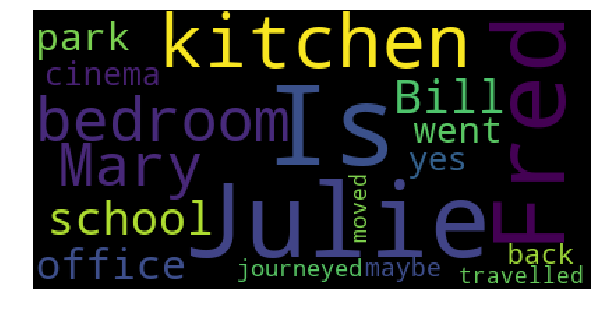

In [28]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud()
wordcloud.fit_words(cwords)

fig=plt.figure(figsize=(10, 10))   # Prepare a plot 5x3 inches
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [29]:
top_all = cwords.most_common()[:7]
top_all_words = [x[0] for x in top_all] 

In [30]:
new_best_words = [w for w in filtered_sentence if w not in top_all_words]
new_best_ctr = Counter(new_best_words)
print(new_best_words)

['Bill', 'Bill', 'Bill', 'journeyed', 'travelled', 'cinema', 'Bill', 'yes', 'went', 'back', 'park', 'Bill', 'office', 'Bill', 'park', 'went', 'cinema', 'office', 'park', 'yes', 'park', 'Bill', 'went', 'back', 'office', 'Bill', 'office', 'yes', 'journeyed', 'office', 'went', 'back', 'cinema', 'office', 'office', 'moved', 'cinema', 'cinema', 'yes', 'journeyed', 'yes', 'Bill', 'Bill', 'went', 'Bill', 'office', 'journeyed', 'park', 'travelled', 'park', 'yes', 'Bill', 'cinema', 'Bill', 'Bill', 'office', 'park', 'maybe', 'went', 'Bill', 'yes', 'yes', 'journeyed', 'travelled', 'park', 'office', 'travelled', 'yes', 'moved', 'office', 'office', 'Bill', 'Bill', 'park', 'maybe', 'went', 'maybe', 'Bill', 'went', 'office', 'park', 'park', 'maybe', 'went', 'Bill', 'office', 'park', 'yes', 'park', 'went', 'back', 'office', 'Bill', 'went', 'back', 'Bill', 'journeyed', 'office', 'yes', 'journeyed', 'cinema', 'moved', 'travelled', 'park', 'yes', 'office', 'cinema', 'park', 'Bill', 'office', 'office', 'o

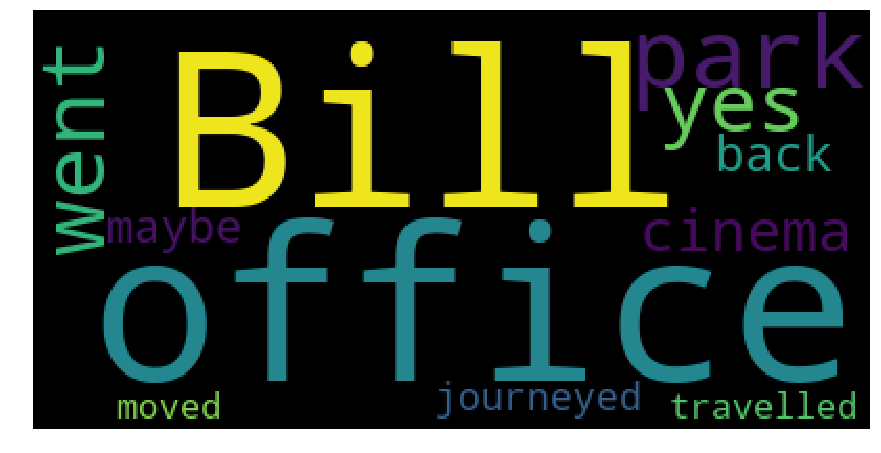

In [31]:
wordcloud = WordCloud()
wordcloud.fit_words(new_best_ctr)

fig=plt.figure(figsize=(15, 15))   # Prepare a plot 5x3 inches
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [32]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [33]:
#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in lines:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [34]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 927 items in vocab_frame


In [35]:
print (vocab_frame.head())
print
print
print
print

         words
mari      mary
is          is
in          in
the        the
school  school


<function print>

Tf-idf and document similarity

Here, I define term frequency-inverse document frequency (tf-idf) vectorizer parameters and then convert the synopses list into a tf-idf matrix.

To get a Tf-idf matrix, first count word occurrences by document. This is transformed into a document-term matrix (dtm). This is also just called a term frequency matrix. An example of a dtm is here at right.

Then apply the term frequency-inverse document frequency weighting: words that occur frequently within a document but not frequently within the corpus receive a higher weighting as these words are assumed to contain more meaning in relation to the document.

A couple things to note about the parameters I define below:

max_df: this is the maximum frequency within the documents a given feature can have to be used in the tfi-idf matrix. If the term is in greater than 80% of the documents it probably cares little meanining (in the context of film synopses) min_idf: this could be an integer (e.g. 5) and the term would have to be in at least 5 of the documents to be considered. Here I pass 0.2; the term must be in at least 20% of the document. I found that if I allowed a lower min_df I ended up basing clustering on names--for example "Michael" or "Tom" are names found in several of the movies and the synopses use these names frequently, but the names carry no real meaning. ngram_range: this just means I'll look at unigrams, bigrams and trigrams. See n-grams

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=200000,
                                 min_df=0.1, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(lines) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

Wall time: 267 ms
(152, 11)


Terms is just a list of the features used in the tf-idf matrix. This is a vocabulary.

dist is defined as 1 - the cosine similarity of each document. Cosine similarity is measured against the tf-idf matrix and can be used to generate a measure of similarity between each document and the other documents in the corpus (each synopsis among the synopses). Subtracting it from 1 provides cosine distance which I will use for plotting on a euclidean (2-dimensional) plane.

Note that with dist it is possible to evaluate the similarity of any two or more synopses.

In [37]:
terms = tfidf_vectorizer.get_feature_names()

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print
print

<function print>

K-means clustering Now onto the fun part. Using the tf-idf matrix, you can run a slew of clustering algorithms to better understand the hidden structure within the synopses. I first chose k-means. K-means initializes with a pre-determined number of clusters (I chose 5). Each observation is assigned to a cluster (cluster assignment) so as to minimize the within cluster sum of squares. Next, the mean of the clustered observations is calculated and used as the new cluster centroid. Then, observations are reassigned to clusters and centroids recalculated in an iterative process until the algorithm reaches convergence.

In [39]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

Wall time: 246 ms


In [40]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

#joblib.dump(km,  'doc_cluster.pkl')
num_clusters = 5

km = KMeans(n_clusters=num_clusters)
%time km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

Wall time: 287 ms


In [41]:
passage = { 'title': filtered_sentence, 'cluster': clusters }

frame = pd.DataFrame(passage, index = [clusters] , columns = ['cluster'])

In [42]:
frame['cluster'].value_counts() #number of words per cluster (clusters from 0 to 4)

0    41
1    32
4    27
2    27
3    25
Name: cluster, dtype: int64

In [43]:
grouped = frame['cluster']

grouped.mean() #average rank (1 to 100) per cluster

1.769736842105263

In [44]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :8]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace

Top terms per cluster:

Cluster 0 words: b'school', b'cinema', b'julie', b'fred', b'went', b'mary', b'yes', b'park',

Cluster 1 words: b'bedroom', b'julie', b'fred', b'went', b'mary', b'school', b'yes', b'kitchen',

Cluster 2 words: b'office', b'mary', b'fred', b'julie', b'went', b'school', b'kitchen', b'yes',

Cluster 3 words: b'park', b'julie', b'fred', b'mary', b'yes', b'went', b'bedroom', b'office',

Cluster 4 words: b'kitchen', b'mary', b'julie', b'fred', b'went', b'yes', b'school', b'park',



In [45]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [46]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'cluster1', 
                 1: 'cluster2', 
                 2: 'cluster3', 
                 3: 'cluster4', 
                 4: 'cluster5'}

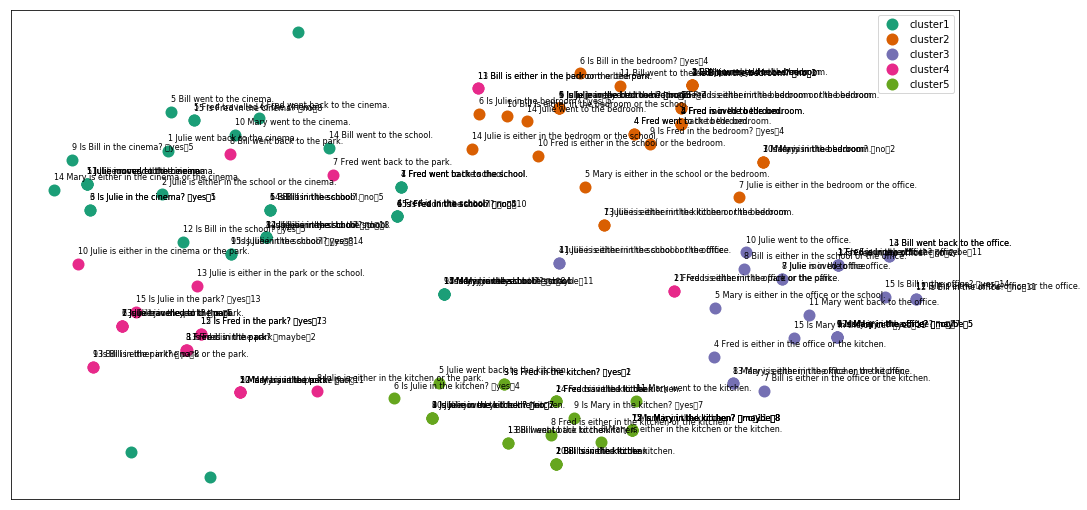

In [47]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=lines)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.iloc[i]['x'], df.iloc[i]['y'], df.iloc[i]['title'], size=8)  

    
    
plt.show() #show the plot

plt.savefig('clusters_small_noaxes.png', dpi=200)

In [48]:
plt.close()

In [49]:
#define custom toolbar location
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [50]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=lines)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

Hierarchical clustering Now that I was successfuly able to cluster and plot the documents using k-means, I wanted to try another clustering algorithm. I chose the Ward clustering algorithm because it offers hierarchical clustering. Ward clustering is an agglomerative clustering method, meaning that at each stage, the pair of clusters with minimum between-cluster distance are merged. I used the precomputed cosine distance matrix (dist) to calclate a linkage_matrix, which I then plot as a dendrogram.

Note that this method returned 3 primary clusters, with the largest cluster being split into about 4 major subclusters.

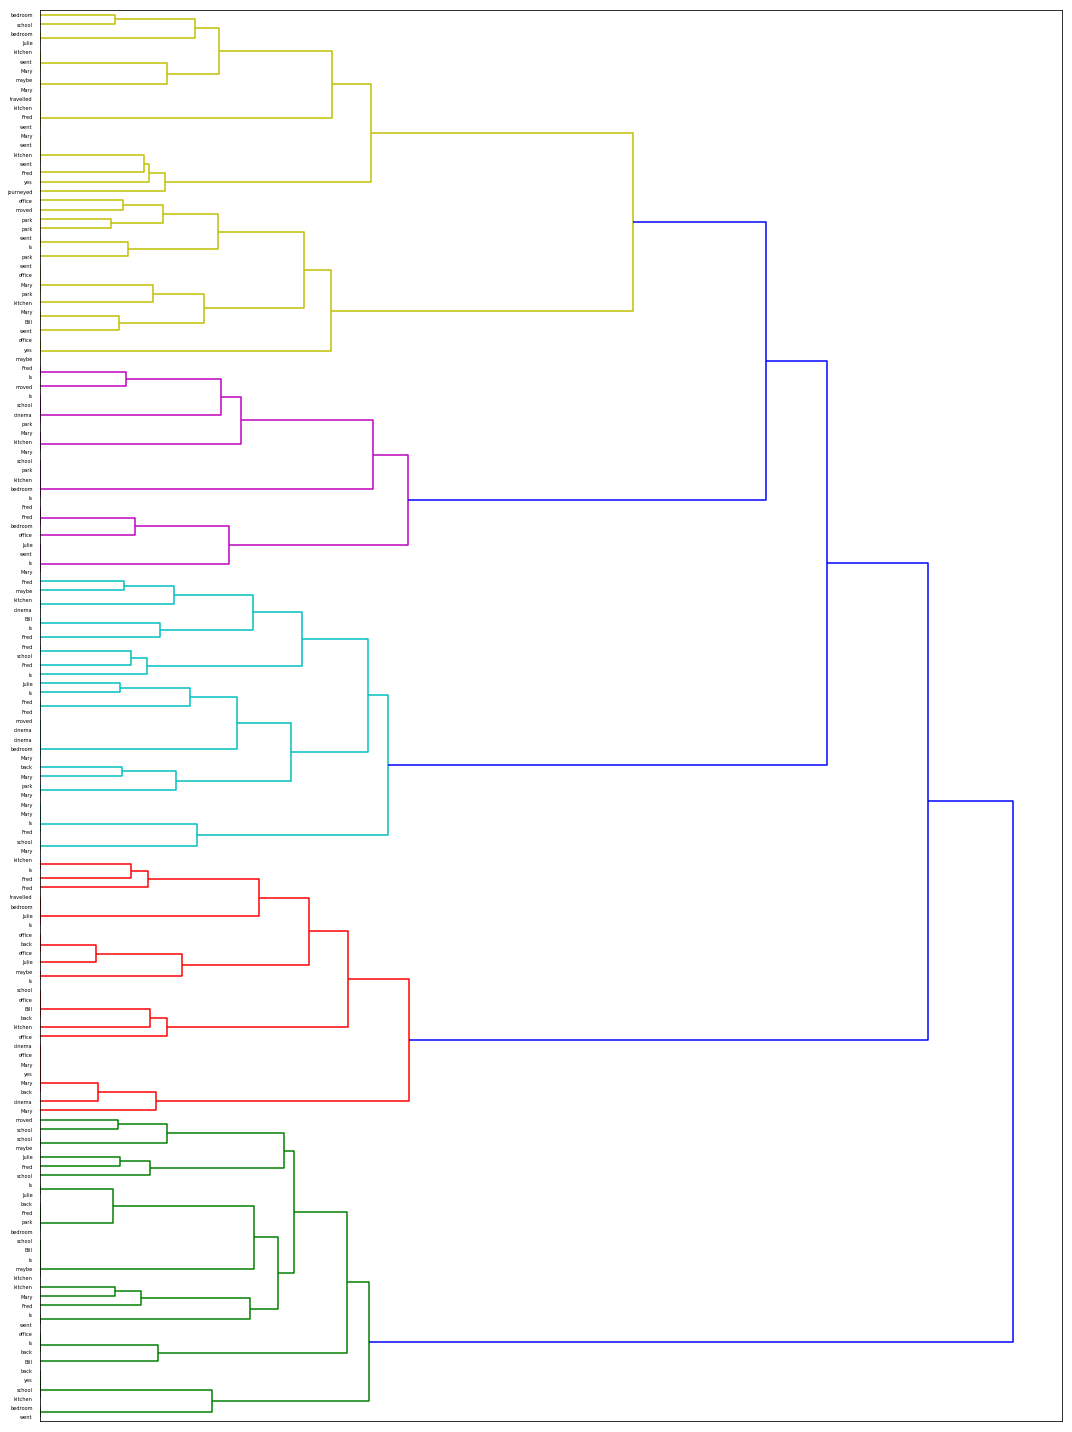

In [51]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=filtered_sentence);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [52]:
plt.close()

Latent Dirichlet Allocation This section focuses on using Latent Dirichlet Allocation (LDA) to learn yet more about the hidden structure within the top 100 lines. LDA is a probabilistic topic model that assumes documents are a mixture of topics and that each word in the document is attributable to the document's topics. There is quite a good high-level overview of probabilistic topic models.

In [53]:
with open("MemN2N-tensorflow-master/data/ptb.test.txt") as f:
    text = f.readlines()

In [54]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [55]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [56]:
from gensim import corpora, models, similarities 

#remove proper names
%time preprocess = [strip_proppers(doc) for doc in lines]

#tokenize
%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]

#remove stop words
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

Wall time: 133 ms
Wall time: 341 ms
Wall time: 7.02 ms


In [57]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

In [58]:
#print(len([word for word in texts[0] if word not in stopwords]))
print(len(texts[0]))

1


In [59]:
print(texts)

[['school'], ['kitchen'], ['bedroom'], ['journey', 'bedroom'], ['travel', 'cinema'], ['bedroom', 'yes'], ['went', 'back', 'park'], ['school', 'offic'], ['park'], ['went', 'cinema'], ['school', 'offic'], ['park', 'yes'], ['park', 'school'], ['went', 'back', 'offic'], ['offic', 'yes'], ['journey', 'offic'], ['went', 'back', 'cinema'], ['offic'], ['school', 'offic'], ['move', 'cinema'], ['cinema', 'yes'], ['kitchen', 'bedroom'], ['journey', 'school'], ['school', 'yes'], ['bedroom', 'school'], ['went', 'bedroom'], ['offic'], ['journey', 'park'], ['travel', 'school'], ['park', 'yes'], ['kitchen'], ['school', 'cinema'], ['bedroom'], ['bedroom'], ['school'], ['bedroom'], ['bedroom', 'offic'], ['park'], ['bedroom', 'mayb'], ['school', 'bedroom'], ['went', 'kitchen'], ['school', 'yes'], ['kitchen', 'bedroom'], ['school'], ['school', 'yes'], ['journey', 'bedroom'], ['travel', 'park'], ['kitchen'], ['offic', 'kitchen'], ['travel', 'bedroom'], ['bedroom', 'yes'], ['move', 'offic'], ['offic', 'kitc

In [60]:
dictionary = corpora.Dictionary(texts)

In [61]:
dictionary.filter_extremes(no_below=1, no_above=0.8)

In [62]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [63]:
len(corpus)

152

In [64]:
%time lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, update_every=5, chunksize=10000, passes=100)

Wall time: 14.4 s


In [65]:
print(lda[corpus[0]])

[(0, 0.10000116), (1, 0.10000171), (2, 0.10000071), (3, 0.100000456), (4, 0.599996)]


In [66]:
topics = lda.print_topics(5, num_words=20)

In [67]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)

In [68]:
print(topics_matrix)

[(0, [('went', 0.60633016), ('back', 0.33320594), ('offic', 0.0055583674), ('school', 0.005535027), ('kitchen', 0.0055300277), ('park', 0.0055178986), ('cinema', 0.005499685), ('bedroom', 0.005496934), ('travel', 0.0054662894), ('yes', 0.005465944), ('journey', 0.005465077), ('mayb', 0.0054644668), ('move', 0.005464252)]), (1, [('cinema', 0.7252488), ('yes', 0.1384539), ('travel', 0.051480092), ('move', 0.008667116), ('journey', 0.008534476), ('went', 0.008480655), ('park', 0.0084646605), ('back', 0.008459989), ('school', 0.008459269), ('offic', 0.008438516), ('kitchen', 0.008438107), ('mayb', 0.008437494), ('bedroom', 0.008436913)]), (2, [('bedroom', 0.63995785), ('move', 0.14485794), ('journey', 0.10993147), ('yes', 0.056071077), ('travel', 0.020802142), ('kitchen', 0.00355238), ('school', 0.0035513004), ('mayb', 0.003551032), ('offic', 0.0035503928), ('park', 0.0035458063), ('went', 0.0035453436), ('cinema', 0.0035449741), ('back', 0.0035382078)]), (3, [('kitchen', 0.41353905), ('of

In [69]:
lda.show_topics()

[(0,
  '0.606*"went" + 0.333*"back" + 0.006*"offic" + 0.006*"school" + 0.006*"kitchen" + 0.006*"park" + 0.005*"cinema" + 0.005*"bedroom" + 0.005*"travel" + 0.005*"yes"'),
 (1,
  '0.725*"cinema" + 0.138*"yes" + 0.051*"travel" + 0.009*"move" + 0.009*"journey" + 0.008*"went" + 0.008*"park" + 0.008*"back" + 0.008*"school" + 0.008*"offic"'),
 (2,
  '0.640*"bedroom" + 0.145*"move" + 0.110*"journey" + 0.056*"yes" + 0.021*"travel" + 0.004*"kitchen" + 0.004*"school" + 0.004*"mayb" + 0.004*"offic" + 0.004*"park"'),
 (3,
  '0.414*"kitchen" + 0.356*"offic" + 0.116*"mayb" + 0.070*"yes" + 0.025*"travel" + 0.002*"journey" + 0.002*"move" + 0.002*"park" + 0.002*"school" + 0.002*"went"'),
 (4,
  '0.445*"school" + 0.351*"park" + 0.083*"yes" + 0.057*"travel" + 0.043*"journey" + 0.003*"mayb" + 0.003*"offic" + 0.003*"bedroom" + 0.003*"went" + 0.003*"back"')]

In [70]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)
topic_words = topics_matrix
for i in topic_words:
    print([str(word) for word in i])
    print()

['0', "[('went', 0.60633016), ('back', 0.33320594), ('offic', 0.0055583674), ('school', 0.005535027), ('kitchen', 0.0055300277), ('park', 0.0055178986), ('cinema', 0.005499685), ('bedroom', 0.005496934), ('travel', 0.0054662894), ('yes', 0.005465944), ('journey', 0.005465077), ('mayb', 0.0054644668), ('move', 0.005464252)]"]

['1', "[('cinema', 0.7252488), ('yes', 0.1384539), ('travel', 0.051480092), ('move', 0.008667116), ('journey', 0.008534476), ('went', 0.008480655), ('park', 0.0084646605), ('back', 0.008459989), ('school', 0.008459269), ('offic', 0.008438516), ('kitchen', 0.008438107), ('mayb', 0.008437494), ('bedroom', 0.008436913)]"]

['2', "[('bedroom', 0.63995785), ('move', 0.14485794), ('journey', 0.10993147), ('yes', 0.056071077), ('travel', 0.020802142), ('kitchen', 0.00355238), ('school', 0.0035513004), ('mayb', 0.003551032), ('offic', 0.0035503928), ('park', 0.0035458063), ('went', 0.0035453436), ('cinema', 0.0035449741), ('back', 0.0035382078)]"]

['3', "[('kitchen', 0.4

In [71]:
topic_words

[(0,
  [('went', 0.60633016),
   ('back', 0.33320594),
   ('offic', 0.0055583674),
   ('school', 0.005535027),
   ('kitchen', 0.0055300277),
   ('park', 0.0055178986),
   ('cinema', 0.005499685),
   ('bedroom', 0.005496934),
   ('travel', 0.0054662894),
   ('yes', 0.005465944),
   ('journey', 0.005465077),
   ('mayb', 0.0054644668),
   ('move', 0.005464252)]),
 (1,
  [('cinema', 0.7252488),
   ('yes', 0.1384539),
   ('travel', 0.051480092),
   ('move', 0.008667116),
   ('journey', 0.008534476),
   ('went', 0.008480655),
   ('park', 0.0084646605),
   ('back', 0.008459989),
   ('school', 0.008459269),
   ('offic', 0.008438516),
   ('kitchen', 0.008438107),
   ('mayb', 0.008437494),
   ('bedroom', 0.008436913)]),
 (2,
  [('bedroom', 0.63995785),
   ('move', 0.14485794),
   ('journey', 0.10993147),
   ('yes', 0.056071077),
   ('travel', 0.020802142),
   ('kitchen', 0.00355238),
   ('school', 0.0035513004),
   ('mayb', 0.003551032),
   ('offic', 0.0035503928),
   ('park', 0.0035458063),
   

In [72]:
def proc_sentence(tokens):
    """
    Takes as input a set of tokens from Stanford Core NLP output and returns 
    the set of peoplefound within the sentence. This relies on the fact that
    named entities which are contiguous within a sentence should be part of 
    the same name. For example, in the following:
    [
        {'word': 'Brandon', 'ner': 'PERSON'},
        {'word': 'Rose', 'ner': 'PERSON'},
        {'word': 'eats', 'ner': 'O'},
        {'word': 'bananas', 'ner': 'O'}
    ]
    we can safely assume that the contiguous PERSONs Brandon + Rose are part of the 
    same named entity, Brandon Rose.
    """
    people = set()
    token_count = 0
    for i in range(len(tokens)):
        if token_count < len(tokens):
            person = ''
            token = tokens[token_count]
            if token['ner'] == 'PERSON':
                person += token['word'].lower()
                checking = True
                while checking == True:
                    if token_count + 1 < len(tokens):
                        if tokens[token_count + 1]['ner'] == 'PERSON':
                            token_count += 1
                            person += ' {}'.format(tokens[token_count]['word'].lower())
                        else:
                            checking = False
                            token_count += 1
                    else:
                        checking = False
                        token_count += 1
            else:
                token_count += 1
            if person != '':
                people.add(person)
    return people

In [73]:
import json, requests

class StanfordCoreNLP:

    def __init__(self, server_url):
        if server_url[-1] == '/':
            server_url = server_url[:-1]
        self.server_url = server_url

    def annotate(self, text, properties=None):
        assert isinstance(text, str)
        if properties is None:
            properties = {}
        else:
            assert isinstance(properties, dict)

        # Checks that the Stanford CoreNLP server is started.
        try:
            requests.get(self.server_url)
        except requests.exceptions.ConnectionError:
            raise Exception('Check whether you have started the CoreNLP server e.g.\n'
            '$ cd stanford-corenlp-full-2015-12-09/ \n'
            '$ java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer')

        data = text.encode()
        r = requests.post(
            self.server_url, params={
                'properties': str(properties)
            }, data=data, headers={'Connection': 'close'})
        output = r.text
        if ('outputFormat' in properties
             and properties['outputFormat'] == 'json'):
            try:
                output = json.loads(output, encoding='utf-8', strict=True)
            except:
                pass
        return output

    def tokensregex(self, text, pattern, filter):
        return self.regex('/tokensregex', text, pattern, filter)

    def semgrex(self, text, pattern, filter):
        return self.regex('/semgrex', text, pattern, filter)

    def regex(self, endpoint, text, pattern, filter):
        r = requests.get(
            self.server_url + endpoint, params={
                'pattern':  pattern,
                'filter': filter
            }, data=text)
        output = r.text
        try:
            output = json.loads(r.text)
        except:
            pass
        return output

# Data Analysis:
Number of Questions and Sentences in the test dataset

Step 1: 
Here I am opening the data and reading the file. 

In [74]:
with open("MemN2N-tensorflow-master/data/ptb.test.txt") as f:
    lines = f.readlines()

In [75]:
# load text
filename = 'MemN2N-tensorflow-master/data/ptb.test.txt'
file = open(filename, 'rt')
text = file.read()
file.close()

Step 2: 
Printing the data to see how it looks like. 

In [76]:
print(text)

1 Mary is in the school.
2 Bill is in the kitchen.
3 Is Bill in the bedroom? 	no	2
4 Bill journeyed to the bedroom.
5 Fred travelled to the cinema.
6 Is Bill in the bedroom? 	yes	4
7 Fred went back to the park.
8 Bill is either in the school or the office.
9 Is Bill in the park? 	no	8
10 Mary went to the cinema.
11 Julie is either in the school or the office.
12 Is Fred in the park? 	yes	7
13 Julie is either in the park or the school.
14 Bill went back to the office.
15 Is Bill in the office? 	yes	14
1 Fred journeyed to the office.
2 Fred went back to the cinema.
3 Is Fred in the office? 	no	2
4 Julie is either in the school or the office.
5 Julie moved to the cinema.
6 Is Julie in the cinema? 	yes	5
7 Julie is either in the kitchen or the bedroom.
8 Julie journeyed to the school.
9 Is Julie in the school? 	yes	8
10 Bill is either in the bedroom or the school.
11 Bill went to the bedroom.
12 Is Bill in the office? 	no	11
13 Julie journeyed to the park.
14 Mary travelled to the school.


Step 3: 
Imported nltk and downloaded nltk’s package ‘punkt’. This package is used to download sentence tokenizer. We have further downloaded and imported sent_tokenizer from nltk.tokenize.  
This tokenizer is used which divides a string into substrings by splitting on the specified string. Therefore, it splits a string into a list of sentences.  
 
Since our data is in string right now, we out tokenizing it into sentences so as to get a proper and meaningful analysis. 

In [77]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Bhanuja
[nltk_data]     Chouhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
from nltk.tokenize import sent_tokenize
tokens = sent_tokenize(text)
print(tokens)

['1 Mary is in the school.', '2 Bill is in the kitchen.', '3 Is Bill in the bedroom?', 'no\t2\n4 Bill journeyed to the bedroom.', '5 Fred travelled to the cinema.', '6 Is Bill in the bedroom?', 'yes\t4\n7 Fred went back to the park.', '8 Bill is either in the school or the office.', '9 Is Bill in the park?', 'no\t8\n10 Mary went to the cinema.', '11 Julie is either in the school or the office.', '12 Is Fred in the park?', 'yes\t7\n13 Julie is either in the park or the school.', '14 Bill went back to the office.', '15 Is Bill in the office?', 'yes\t14\n1 Fred journeyed to the office.', '2 Fred went back to the cinema.', '3 Is Fred in the office?', 'no\t2\n4 Julie is either in the school or the office.', '5 Julie moved to the cinema.', '6 Is Julie in the cinema?', 'yes\t5\n7 Julie is either in the kitchen or the bedroom.', '8 Julie journeyed to the school.', '9 Is Julie in the school?', 'yes\t8\n10 Bill is either in the bedroom or the school.', '11 Bill went to the bedroom.', '12 Is Bill

Step 4: 
Imported ‘Regular Expressions’ to search for all the questions in our dataset. 

In [79]:
import re

In [80]:
question = [q for q in text if re.search(r'(\?)$',q)]
print(question)

['?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?', '?']


Step 5: 
Imported Counter from collections package to count the number of questions in our dataset. As we can see, there are 50 questions.

In [81]:
from collections import Counter
c = Counter(question)
print(c)

Counter({'?': 50})


Step 6: 
Similarly, we have searched for all the sentences ending with ‘.’ to know the number of supporting facts and sentences for each question approximately. As we can see, there are 99 questions.  
 
Therefore, there are two sentences (one supporting fact) for each question on an average. 

In [82]:
sentence = [q for q in text if re.search(r'(\.)$',q)]
print(sentence)

['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']


In [83]:
s = Counter(sentence)
print(s)

Counter({'.': 99})


Result: There are 50 questions and 99 sentences in this dataset

# Sentiment Analysis

Sentiment Analysis is the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc., is positive, negative, or neutral.  
 
In this case, we have used Vader – SentimentIntensityAnalyzer. 
VADER (Valence Aware Dictionary for sEntiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. VADER text sentiment analysis uses a human-centric approach, combining qualitative analysis and empirical validation by using human raters and the wisdom of the crowd. 

It combines a dictionary, which maps lexical features to emotion intensity, and five simple heuristics, which encode how contextual elements increment, decrement, or negate the sentiment of text.

In [84]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

C:\ProgramData\Miniconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


The VADER algorithm outputs sentiment scores to 4 classes of sentiments: 
•	neg: Negative 
•	neu: Neutral 
•	pos: Positive 
•	compound: Compound (i.e. aggregated score) 

In [85]:
sentenceAnalyzer = SentimentIntensityAnalyzer()
for sentence in tokens:
    print(sentence)
    ss = sentenceAnalyzer.polarity_scores(sentence)
    for k in ss:
        a = '{0}: {1},'.format(k, ss[k])
        print(a)

1 Mary is in the school.
neg: 0.0,
neu: 1.0,
pos: 0.0,
compound: 0.0,
2 Bill is in the kitchen.
neg: 0.0,
neu: 1.0,
pos: 0.0,
compound: 0.0,
3 Is Bill in the bedroom?
neg: 0.0,
neu: 1.0,
pos: 0.0,
compound: 0.0,
no	2
4 Bill journeyed to the bedroom.
neg: 0.306,
neu: 0.694,
pos: 0.0,
compound: -0.296,
5 Fred travelled to the cinema.
neg: 0.0,
neu: 1.0,
pos: 0.0,
compound: 0.0,
6 Is Bill in the bedroom?
neg: 0.0,
neu: 1.0,
pos: 0.0,
compound: 0.0,
yes	4
7 Fred went back to the park.
neg: 0.0,
neu: 0.69,
pos: 0.31,
compound: 0.4019,
8 Bill is either in the school or the office.
neg: 0.0,
neu: 1.0,
pos: 0.0,
compound: 0.0,
9 Is Bill in the park?
neg: 0.0,
neu: 1.0,
pos: 0.0,
compound: 0.0,
no	8
10 Mary went to the cinema.
neg: 0.268,
neu: 0.732,
pos: 0.0,
compound: -0.296,
11 Julie is either in the school or the office.
neg: 0.0,
neu: 1.0,
pos: 0.0,
compound: 0.0,
12 Is Fred in the park?
neg: 0.0,
neu: 1.0,
pos: 0.0,
compound: 0.0,
yes	7
13 Julie is either in the park or the school.
neg: 0

We then wanted to know the count of positive, negative, neutral and compound sentences in our dataset. 
This will tell us about the intensity and sentiment of the dataset. 

Negative:

In [86]:
sentenceAnalyzer = SentimentIntensityAnalyzer()
d = {}
list_ss_neg = []
for sentence in tokens:
    #print(sentence)
    list_ss_neg.append(sentenceAnalyzer.polarity_scores(sentence)['neg'])

In [87]:
nonzero_neg_list=[]
for a in list_ss_neg:
    if a!=0.0:
        nonzero_neg_list.append(a)

In [88]:
print(nonzero_neg_list)

[0.306, 0.268, 0.196, 0.239, 0.306, 0.196, 0.196, 0.268, 0.196, 0.216, 0.306, 0.18, 0.18, 0.306, 0.306, 0.18, 0.167, 0.268, 0.306, 0.268, 0.306, 0.268]


In [89]:
from collections import Counter
count_neg = Counter(nonzero_neg_list)
print(count_neg)
sum(count_neg.values())

Counter({0.306: 7, 0.268: 5, 0.196: 4, 0.18: 3, 0.239: 1, 0.216: 1, 0.167: 1})


22

There are 22 negative questions/responses in the dataset

Positive:

In [90]:
sentenceAnalyzer = SentimentIntensityAnalyzer()
d = {}
list_ss_pos=[]
for sentence in tokens:
    #print(sentence)
    list_ss_pos.append(sentenceAnalyzer.polarity_scores(sentence)['pos'])

In [91]:
nonzero_pos_list=[]
for b in list_ss_pos:
    if b!=0.0:
        nonzero_pos_list.append(b)

In [92]:
print(nonzero_pos_list)

[0.31, 0.213, 0.31, 0.231, 0.213, 0.31, 0.213, 0.31, 0.351, 0.31, 0.31, 0.351, 0.351, 0.31, 0.31, 0.351, 0.31, 0.31]


In [93]:
from collections import Counter
count_pos = Counter(nonzero_pos_list)
print(count_pos)
sum(count_pos.values())

Counter({0.31: 10, 0.351: 4, 0.213: 3, 0.231: 1})


18

There are 18 positive questions/responses in the dataset

Compound:

In [94]:
sentenceAnalyzer = SentimentIntensityAnalyzer()
d = {}
list_ss_compound=[]
for sentence in tokens:
    #print(sentence)
    list_ss_compound.append(sentenceAnalyzer.polarity_scores(sentence)['compound'])

In [95]:
nonzero_compound_list=[]
for b in list_ss_compound:
    if b!=0.0:
        nonzero_compound_list.append(b)

In [96]:
print(nonzero_compound_list)

[-0.296, 0.4019, -0.296, 0.4019, 0.4019, -0.296, 0.4019, 0.4019, -0.296, 0.4019, -0.296, -0.296, 0.4019, 0.4019, -0.296, 0.4019, -0.296, -0.296, 0.4019, -0.296, 0.4019, -0.296, 0.4019, -0.296, -0.296, -0.296, 0.4019, -0.296, 0.4019, -0.296, -0.296, -0.296, 0.4019, -0.296, -0.296, 0.4019, -0.296, 0.4019, 0.4019, -0.296]


In [97]:
from collections import Counter
count_compound = Counter(nonzero_compound_list)
print(count_compound)
#sum(count_neu.values())

Counter({-0.296: 22, 0.4019: 18})


According to the result, the dataset has more negative responses than positive. 22 negative responses and 18 negative to be precise.
Compound score tells us how negative or how positive our dataset is. And here, the data is more negative.

# Model

1.	Set parameters which will be used during building End-to-end Memory Networks
a.	"edim", 20, "internal state dimension [20]"
b.	"nhop", 3, "number of hops [3]"
c.	"mem_size", 50, "maximum number of sentences that can be encoded into memory [50]"
d.	"batch_size", 32, "batch size to use during training [32]"
e.	"nepoch", 100, "number of epoch to use during training [100]"
f.	"anneal_epoch", 25, "anneal the learning rate every <anneal_epoch> epochs [25]"
g.	"babi_task", 1, "index of bAbI task for the network to learn [1]"
h.	"init_lr", 0.01, "initial learning rate [0.01]"
i.	"anneal_rate", 0.5, "learning rate annealing rate [0.5]"
j.	"init_mean", 0., "weight initialization mean [0.]"
k.	"init_std", 0.1, "weight initialization std [0.1]"
l.	"max_grad_norm", 40, "clip gradients to this norm [40]"
m.	"data_dir", "./data", "dataset directory [./data]"
n.	"checkpoint_dir", "./checkpoints", "checkpoint directory [./checkpoints]"
o.	"lin_start", False, "True for linear start training, False for otherwise [False]"
p.	"is_test", False, "True for testing, False for training [False]"
q.	"show_progress", False, "print progress [False]"

In [1]:
import os

import pprint
import tensorflow as tf

from data import read_data, pad_data
from model import MemN2N

pp = pprint.PrettyPrinter()

flags = tf.app.flags

flags.DEFINE_integer("edim", 20, "internal state dimension [20]")
flags.DEFINE_integer("nhop", 3, "number of hops [3]")
flags.DEFINE_integer("mem_size", 50, "maximum number of sentences that can be encoded into memory [50]")
flags.DEFINE_integer("batch_size", 32, "batch size to use during training [32]")
flags.DEFINE_integer("nepoch", 100, "number of epoch to use during training [100]")
flags.DEFINE_integer("anneal_epoch", 25, "anneal the learning rate every <anneal_epoch> epochs [25]")
flags.DEFINE_integer("babi_task", 1, "index of bAbI task for the network to learn [1]")
flags.DEFINE_float("init_lr", 0.01, "initial learning rate [0.01]")
flags.DEFINE_float("anneal_rate", 0.5, "learning rate annealing rate [0.5]")
flags.DEFINE_float("init_mean", 0., "weight initialization mean [0.]")
flags.DEFINE_float("init_std", 0.1, "weight initialization std [0.1]")
flags.DEFINE_float("max_grad_norm", 40, "clip gradients to this norm [40]")
flags.DEFINE_string("data_dir", "./data", "dataset directory [./data]")
flags.DEFINE_string("checkpoint_dir", "./checkpoints", "checkpoint directory [./checkpoints]")
flags.DEFINE_boolean("lin_start", False, "True for linear start training, False for otherwise [False]")
flags.DEFINE_boolean("is_test", False, "True for testing, False for training [False]")
flags.DEFINE_boolean("show_progress", False, "print progress [False]")

FLAGS = flags.FLAGS

# Data preprocessing

1.	Word2idx represents a map between each word and its index in the dictionary
2.	Max_words represents the maximum words in each sentence
3.	max_sentences  represents the maximum sentences in a story
4.	load data for train, valid and test
5.	Pad_data dataset
6.	set other parameters to FLAGS and used to train the model
7.	create a TensorFlow session and build and train the model inside this session

In [2]:
word2idx = {}
max_words = 0
max_sentences = 0

if not os.path.exists(FLAGS.checkpoint_dir):
    os.makedirs(FLAGS.checkpoint_dir)

train_stories, train_questions, max_words, max_sentences = read_data('{}/qa{}_train.txt'.format(FLAGS.data_dir, FLAGS.babi_task), word2idx, max_words, max_sentences)
valid_stories, valid_questions, max_words, max_sentences = read_data('{}/qa{}_valid.txt'.format(FLAGS.data_dir, FLAGS.babi_task), word2idx, max_words, max_sentences)
test_stories, test_questions, max_words, max_sentences = read_data('{}/qa{}_test.txt'.format(FLAGS.data_dir, FLAGS.babi_task), word2idx, max_words, max_sentences)

pad_data(train_stories, train_questions, max_words, max_sentences)
pad_data(valid_stories, valid_questions, max_words, max_sentences)
pad_data(test_stories, test_questions, max_words, max_sentences)

idx2word = dict(zip(word2idx.values(), word2idx.keys()))
FLAGS.nwords = len(word2idx)
FLAGS.max_words = max_words
FLAGS.max_sentences = max_sentences

pp.pprint(flags.FLAGS.__flags)

with tf.Session() as sess:
    model = MemN2N(FLAGS, sess)
    model.build_model()
    
    if FLAGS.is_test:
        model.run(valid_stories, valid_questions, test_stories, test_questions)
    else:
        model.run(train_stories, train_questions, valid_stories, valid_questions)
        
    predictions, target = model.predict(train_stories, train_questions)

{'anneal_epoch': 25,
 'anneal_rate': 0.5,
 'babi_task': 1,
 'batch_size': 32,
 'checkpoint_dir': './checkpoints',
 'data_dir': './data',
 'edim': 20,
 'init_lr': 0.01,
 'init_mean': 0.0,
 'init_std': 0.1,
 'is_test': False,
 'lin_start': False,
 'max_grad_norm': 40,
 'max_sentences': 10,
 'max_words': 7,
 'mem_size': 50,
 'nepoch': 100,
 'nhop': 3,
 'nwords': 20,
 'show_progress': False}
{'loss': 2.2065385140313043, 'epoch': 0, 'learning_rate': 0.01, 'validation_loss': 1.9798706436157227}
{'loss': 1.8393249766031901, 'epoch': 1, 'learning_rate': 0.01, 'validation_loss': 1.9147063827514648}
{'loss': 1.7263444349500867, 'epoch': 2, 'learning_rate': 0.01, 'validation_loss': 1.8230143356323243}
{'loss': 1.5752538384331598, 'epoch': 3, 'learning_rate': 0.01, 'validation_loss': 1.612121925354004}
{'loss': 1.283368165757921, 'epoch': 4, 'learning_rate': 0.01, 'validation_loss': 1.2552183151245118}
{'loss': 0.94624469121297206, 'epoch': 5, 'learning_rate': 0.01, 'validation_loss': 1.0329034423

{'loss': 0.41784931129879421, 'epoch': 75, 'learning_rate': 0.0025, 'validation_loss': 0.41226480484008787}
{'loss': 0.39581487390730113, 'epoch': 76, 'learning_rate': 0.00125, 'validation_loss': 0.35194939613342285}
{'loss': 0.39004263401031491, 'epoch': 77, 'learning_rate': 0.00125, 'validation_loss': 0.35275982856750487}
{'loss': 0.38744801309373644, 'epoch': 78, 'learning_rate': 0.00125, 'validation_loss': 0.35277805328369138}
{'loss': 0.3857237206565009, 'epoch': 79, 'learning_rate': 0.00125, 'validation_loss': 0.35226234436035159}
{'loss': 0.38436965359581843, 'epoch': 80, 'learning_rate': 0.00125, 'validation_loss': 0.35141809463500978}
{'loss': 0.38320897208319771, 'epoch': 81, 'learning_rate': 0.00125, 'validation_loss': 0.35038711547851564}
{'loss': 0.38216560681660972, 'epoch': 82, 'learning_rate': 0.00125, 'validation_loss': 0.34924753189086916}
{'loss': 0.38119912836286757, 'epoch': 83, 'learning_rate': 0.00125, 'validation_loss': 0.34804523468017579}
{'loss': 0.3802835565

In [5]:
from data import depad_data
import numpy as np

# randomly generate a number for index
index = 25
# depad data from train stories and questions
depad_data(train_stories, train_questions)

# use index to get questiona, answer, story_index and sentence
question = train_questions[index]['question']
answer = train_questions[index]['answer']
story_index = train_questions[index]['story_index']
sentence_index = train_questions[index]['sentence_index']

# get storys
story = train_stories[story_index][:sentence_index + 1]

# use index to word mapping to convert index to sentence for story and question virtualization
story = [list(map(idx2word.get, sentence)) for sentence in story]
question = list(map(idx2word.get, question))
# predict the result
prediction = [idx2word[np.argmax(predictions[index])]]
# use index 2 word to convert from word indexs to words
answer = list(map(idx2word.get, answer))

print('Story:')
pp.pprint(story)
print('\nQuestion:')
pp.pprint(question)
print('\nPrediction:')
pp.pprint(prediction)
print('\nAnswer:')
pp.pprint(answer)
print('\nCorrect:')
pp.pprint(prediction == answer)

Story:
[['john', 'moved', 'to', 'the', 'bedroom'],
 ['mary', 'moved', 'to', 'the', 'hallway']]

Question:
['where', 'is', 'mary']

Prediction:
['hallway']

Answer:
['hallway']

Correct:
True


# Entity Extraction and Network Analysis 

To extract meaningful information from raw text and use it to analyze the networks of individuals hidden within the data set. 
To take a set of documents (in our case, training dataset), extract entities from within them, and develop a social network based on entity document co-occurrence. This can be a useful approach for getting a sense of which entities exist in a set of documents and how those entities might be related. The primary piece of software used is Stanford Core NLP. 
 
Stanford Core NLP is one of the most popular natural language processing tools out there. It has a ton of functionality which includes part of speech tagging, parsing, lemmatization, tokenization, and what we are interested in: named entity recognition (NER). NER is the process of analyzing text to find people, places, and organizations contained within the text. These named entities will form the basis of the rest of our analysis, so being able to extract them from text is critical. 
Browser go to http://localhost:9000 for the tool. We receive a set of the extracted people entities from each sentence. When a text is entered, the software it gives the output as Parts-of-Speech.  , named entity, dependency parse, basic and advanced dependencies for each work in the sentence.  

CONCLUSION

In this work we showed that a neural network with an explicit memory and a recurrent attention mechanism for reading the memory can be successfully trained via back propagation on QA tasks. 
Compared to the Memory Network implementation, there is no supervision of supporting facts and so the N2N MemNet model can be used in a wider range of settings. This model approaches the same performance of that model, and is significantly better than other baselines with the same level of supervision. 
On QA task we can see that increasing the number of memory hops improves performance.


RESULTS

We report a variety of design choices varying memory hops from 1 to 3.			
The mean performance results across all 20 tasks are given in Table 1 for the 1k training set

Hops	1 hop	2 hops	3 hops
Mean error (%)	25.8	15.6	13.3





Table1: Shows the mean error of the 3 Hops used to train the model


# References

Data:
[1] https://research.fb.com/downloads/babi/

Paper: 
[2] MEMORY NETWORKS Jason Weston, Sumit Chopra & Antoine Bordes, https://arxiv.org/abs/1410.3916
[3] End-To-End Memory Networks Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, Rob Fergus, https://arxiv.org/abs/1503.08895

Blog:
https://blog.csdn.net/irving_zhang/article/details/79094416
https://blog.csdn.net/Irving_zhang/article/details/7911112
https://blog.csdn.net/irving_zhang/article/details/78113251https://github.com/carpedm20/MemN2N-tensorflow
https://github.com/domluna/memn2n
https://github.com/1202kbs/MemN2N-Tensorflow
http://neuralnetworksanddeeplearning.com/chap1.html
http://www.thespermwhale.com/jaseweston/icml2016/
http://brandonrose.org/clustering
http://snap.stanford.edu/proj/embeddings-www/

